In [521]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [522]:
df = pd.read_csv("data/Per 100 Poss.csv") # load dataset into a dataframe

# removing players from seasons prior to 2013 - prior to the modern era of basketball
df = df.drop(df[df.season < 2013].index)


# Pre-processing data

## Size of data and variable types

In [523]:
df.columns # list all the different columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg_per_100_poss',
       'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
       'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss',
       'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss',
       'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss',
       'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
       'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss',
       'pf_per_100_poss', 'pts_per_100_poss', 'o_rtg', 'd_rtg'],
      dtype='object')

In [524]:
df.dtypes # returns the datatype of each column

seas_id                int64
season                 int64
player_id              int64
player                object
birth_year           float64
pos                   object
age                    int64
experience             int64
lg                    object
tm                    object
g                      int64
gs                   float64
mp                     int64
fg_per_100_poss      float64
fga_per_100_poss     float64
fg_percent           float64
x3p_per_100_poss     float64
x3pa_per_100_poss    float64
x3p_percent          float64
x2p_per_100_poss     float64
x2pa_per_100_poss    float64
x2p_percent          float64
ft_per_100_poss      float64
fta_per_100_poss     float64
ft_percent           float64
orb_per_100_poss     float64
drb_per_100_poss     float64
trb_per_100_poss     float64
ast_per_100_poss     float64
stl_per_100_poss     float64
blk_per_100_poss     float64
tov_per_100_poss     float64
pf_per_100_poss      float64
pts_per_100_poss     float64
o_rtg         

In [525]:
df.shape # returns the shape of data - rows and columns

(7150, 36)

In [528]:
df.index

RangeIndex(start=0, stop=7150, step=1)

## Preliminary exploration of values in the data

In [529]:
df.sample(10) # view random rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
4437,26618,2017,3613,José Calderón,NaN,PG,35,12,NBA,TOT,...,5.4,6.7,8.0,1.0,0.1,3.7,3.3,12.8,100.0,113.0
2112,29639,2021,4461,Yogi Ferrell,NaN,PG,27,5,NBA,TOT,...,5.1,6.9,8.0,2.5,1.1,1.1,4.0,20.4,110.0,111.0
424,30882,2023,3779,Mike Conley,NaN,PG,35,16,NBA,UTA,...,3.4,4.0,12.4,1.7,0.4,2.8,3.5,17.4,123.0,119.0
6725,24058,2013,3752,Dominic McGuire,NaN,SF,27,6,NBA,TOR,...,8.5,11.1,2.3,1.2,1.8,1.6,6.0,7.4,97.0,106.0
7077,24410,2013,3644,Shavlik Randolph,NaN,PF,29,6,NBA,BOS,...,11.1,18.5,1.1,2.1,1.8,2.6,10.0,17.7,110.0,98.0
4630,26811,2017,3847,Roy Hibbert,NaN,C,30,9,NBA,CHO,...,7.3,11.2,1.5,0.6,3.3,2.3,7.3,16.2,117.0,107.0
6596,23929,2013,3171,Andre Miller,NaN,PG,36,14,NBA,DEN,...,4.2,5.6,11.4,1.7,0.3,4.0,3.7,18.4,112.0,109.0
3622,27062,2018,4157,Dennis Schröder,NaN,PG,24,5,NBA,ATL,...,3.9,4.9,9.8,1.7,0.1,4.3,3.5,30.6,104.0,113.0
2590,28761,2020,4551,Monte Morris,NaN,PG,24,3,NBA,DEN,...,3.4,4.1,7.7,1.7,0.5,1.6,2.2,19.9,118.0,114.0
5069,26077,2016,4342,Kevon Looney,NaN,PF,19,1,NBA,GSW,...,13.8,23.0,0.0,0.0,0.0,2.3,4.6,20.7,125.0,105.0


In [530]:
df.head() # view first rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
0,30458,2023,5025,A.J. Green,NaN,SG,23,1,NBA,MIL,...,4.7,5.5,2.4,1.0,0.0,1.4,4.7,23.8,125.0,114.0
1,30459,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,TOT,...,6.4,7.9,0.8,0.8,0.0,0.8,6.4,27.0,118.0,118.0
2,30460,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,MIN,...,23.7,23.7,0.0,0.0,0.0,0.0,23.7,47.4,200.0,106.0
3,30461,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,DAL,...,5.8,7.4,0.8,0.8,0.0,0.8,5.8,26.3,116.0,119.0
4,30462,2023,4219,Aaron Gordon,NaN,PF,27,9,NBA,DEN,...,7.2,11.0,4.6,1.3,1.3,2.6,3.0,27.8,127.0,114.0


In [531]:
df.tail() # view last rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
7145,24478,2013,3492,Willie Green,NaN,SG,31,10,NBA,LAC,...,3.5,4.3,2.4,1.3,0.5,1.4,4.3,19.9,113.0,108.0
7146,24479,2013,3793,Wilson Chandler,NaN,PF,25,6,NBA,DEN,...,8.1,10.2,2.7,2.1,0.6,2.8,5.6,26.2,110.0,105.0
7147,24480,2013,3980,Xavier Henry,NaN,SF,21,3,NBA,NOH,...,6.0,7.8,1.1,1.4,0.4,2.7,6.2,16.8,94.0,111.0
7148,24481,2013,3363,Zach Randolph,NaN,PF,31,12,NBA,MEM,...,11.3,17.8,2.2,1.3,0.6,3.1,3.7,24.3,106.0,99.0
7149,24482,2013,3494,Zaza Pachulia,NaN,C,28,10,NBA,ATL,...,9.3,15.4,3.6,1.6,0.5,3.2,5.8,14.0,108.0,104.0


In [532]:
df.describe() # view the description of the numerical values in the data set 

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
count,7150.000000,7150.000000,7150.000000,53.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7149.000000,...,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7116.000000,7149.000000
mean,27484.500000,2018.191608,4186.560559,1986.981132,26.226713,5.459720,42.595245,19.522657,961.848811,7.153854,...,6.660330,8.941376,4.230648,1.556553,0.984068,2.702756,4.626549,19.186502,105.446318,109.792978
std,2064.171545,3.135926,424.977956,5.238506,4.157743,4.089226,25.501463,25.499963,797.908434,2.972217,...,3.324658,4.763022,2.950488,1.168565,1.102453,1.650478,2.569354,7.635843,20.088240,5.236136
min,23910.000000,2013.000000,2863.000000,1975.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
25%,25697.250000,2015.000000,3891.000000,1983.000000,23.000000,2.000000,20.000000,0.000000,233.250000,5.500000,...,4.500000,5.600000,2.200000,1.000000,0.300000,1.800000,3.300000,14.800000,99.000000,107.000000
50%,27484.500000,2018.000000,4188.500000,1987.000000,26.000000,4.000000,45.000000,6.000000,787.000000,7.000000,...,6.100000,7.800000,3.400000,1.400000,0.700000,2.500000,4.200000,18.700000,107.000000,110.000000
75%,29271.750000,2021.000000,4490.000000,1990.000000,29.000000,8.000000,66.000000,34.000000,1571.750000,8.800000,...,8.400000,11.600000,5.700000,1.900000,1.300000,3.400000,5.500000,23.300000,114.000000,113.000000
max,31059.000000,2023.000000,5100.000000,2002.000000,43.000000,22.000000,83.000000,82.000000,3167.000000,52.600000,...,49.700000,53.100000,49.000000,25.000000,24.100000,38.400000,99.800000,150.400000,300.000000,127.000000


In [533]:
 # get info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seas_id            7150 non-null   int64  
 1   season             7150 non-null   int64  
 2   player_id          7150 non-null   int64  
 3   player             7150 non-null   object 
 4   birth_year         53 non-null     float64
 5   pos                7150 non-null   object 
 6   age                7150 non-null   int64  
 7   experience         7150 non-null   int64  
 8   lg                 7150 non-null   object 
 9   tm                 7150 non-null   object 
 10  g                  7150 non-null   int64  
 11  gs                 7150 non-null   float64
 12  mp                 7150 non-null   int64  
 13  fg_per_100_poss    7149 non-null   float64
 14  fga_per_100_poss   7149 non-null   float64
 15  fg_percent         7099 non-null   float64
 16  x3p_per_100_poss   7149 

## Removing columns with too many or too few unique values

In [534]:
# print sum of unique values for each column
for col in df.columns:
  print(f"{col}: {len(df[col].unique())}")

seas_id: 7150
season: 11
player_id: 1459
player: 1455
birth_year: 15
pos: 16
age: 25
experience: 22
lg: 1
tm: 33
g: 83
gs: 83
mp: 2410
fg_per_100_poss: 181
fga_per_100_poss: 315
fg_percent: 494
x3p_per_100_poss: 90
x3pa_per_100_poss: 198
x3p_percent: 371
x2p_per_100_poss: 174
x2pa_per_100_poss: 283
x2p_percent: 466
ft_per_100_poss: 146
fta_per_100_poss: 173
ft_percent: 536
orb_per_100_poss: 128
drb_per_100_poss: 190
trb_per_100_poss: 267
ast_per_100_poss: 165
stl_per_100_poss: 98
blk_per_100_poss: 81
tov_per_100_poss: 129
pf_per_100_poss: 167
pts_per_100_poss: 432
o_rtg: 182
d_rtg: 51


In [535]:
# drop seas_id as values are unique for each row
df = df.drop(['seas_id'], axis=1)

# drop lg as it has too few unique values
df = df.drop(['lg'], axis=1)

## Removing/replacing NaN values

In [536]:
# get the number of missing data points per column
df.isnull().sum()

season                  0
player_id               0
player                  0
birth_year           7097
pos                     0
age                     0
experience              0
tm                      0
g                       0
gs                      0
mp                      0
fg_per_100_poss         1
fga_per_100_poss        1
fg_percent             51
x3p_per_100_poss        1
x3pa_per_100_poss       1
x3p_percent           659
x2p_per_100_poss        1
x2pa_per_100_poss       1
x2p_percent           113
ft_per_100_poss         1
fta_per_100_poss        1
ft_percent            441
orb_per_100_poss        1
drb_per_100_poss        1
trb_per_100_poss        1
ast_per_100_poss        1
stl_per_100_poss        1
blk_per_100_poss        1
tov_per_100_poss        1
pf_per_100_poss         1
pts_per_100_poss        1
o_rtg                  34
d_rtg                   1
dtype: int64

### Removing players that don't have enough minutes and games

In [537]:
# remove players that played less than 1/4 of all total games
df = df.drop(df[df.g < 30].index)

# remove players that played less than 1/4 of possible game time
df = df.drop(df[df.mp < (12*82)].index)

## most missing values were from players who did not play a lot of minutes/games
df.isnull().sum()

season                  0
player_id               0
player                  0
birth_year           3077
pos                     0
age                     0
experience              0
tm                      0
g                       0
gs                      0
mp                      0
fg_per_100_poss         0
fga_per_100_poss        0
fg_percent              0
x3p_per_100_poss        0
x3pa_per_100_poss       0
x3p_percent           110
x2p_per_100_poss        0
x2pa_per_100_poss       0
x2p_percent             0
ft_per_100_poss         0
fta_per_100_poss        0
ft_percent              0
orb_per_100_poss        0
drb_per_100_poss        0
trb_per_100_poss        0
ast_per_100_poss        0
stl_per_100_poss        0
blk_per_100_poss        0
tov_per_100_poss        0
pf_per_100_poss         0
pts_per_100_poss        0
o_rtg                   0
d_rtg                   0
dtype: int64

### Removing birth_year and filling NaN x3p percent

In [538]:
# drop birth year as it has too many null values and is not relevant
df = df.drop(['birth_year'], axis=1)

# replacing NaN values for 3 point shots % with 0
df['x3p_percent'] = df['x3p_percent'].fillna(0)

# no more missing values
df.isnull().sum()

season               0
player_id            0
player               0
pos                  0
age                  0
experience           0
tm                   0
g                    0
gs                   0
mp                   0
fg_per_100_poss      0
fga_per_100_poss     0
fg_percent           0
x3p_per_100_poss     0
x3pa_per_100_poss    0
x3p_percent          0
x2p_per_100_poss     0
x2pa_per_100_poss    0
x2p_percent          0
ft_per_100_poss      0
fta_per_100_poss     0
ft_percent           0
orb_per_100_poss     0
drb_per_100_poss     0
trb_per_100_poss     0
ast_per_100_poss     0
stl_per_100_poss     0
blk_per_100_poss     0
tov_per_100_poss     0
pf_per_100_poss      0
pts_per_100_poss     0
o_rtg                0
d_rtg                0
dtype: int64

## Removing columns that are irrelevant for clustering

In [539]:
# drop columns
df_dropped = df.drop(['season','player','player_id','experience','tm','age','gs','pos','g','mp'], axis=1)

df_dropped.columns


Index(['fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
       'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss',
       'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss',
       'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss',
       'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
       'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss',
       'pf_per_100_poss', 'pts_per_100_poss', 'o_rtg', 'd_rtg'],
      dtype='object')

In [540]:
df_dropped.head(10) # view first 10 rows

,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
4,10.6,18.0,0.587,1.6,4.1,0.397,9.0,13.9,0.644,5.0,...,7.2,11.0,4.6,1.3,1.3,2.6,3.0,27.8,127.0,114.0
6,6.5,15.6,0.418,3.0,8.3,0.357,3.5,7.3,0.487,3.1,...,5.7,7.3,2.4,1.5,0.8,1.8,6.6,19.0,110.0,117.0
9,8.6,18.1,0.477,3.5,8.8,0.394,5.1,9.3,0.555,1.1,...,3.8,4.8,2.3,1.6,0.3,1.4,2.8,21.8,115.0,117.0
10,5.5,11.8,0.464,3.2,7.7,0.422,2.3,4.2,0.542,0.5,...,8.0,9.9,4.2,0.8,1.4,1.0,3.0,14.7,128.0,112.0
11,8.7,19.7,0.440,4.2,10.0,0.424,4.5,9.8,0.456,6.5,...,5.6,6.4,4.7,1.6,0.3,2.5,4.2,28.1,120.0,120.0
13,3.7,8.4,0.442,1.6,4.2,0.381,2.1,4.2,0.505,1.9,...,5.0,6.2,6.4,3.3,1.3,2.6,4.9,10.9,112.0,109.0
17,10.1,18.0,0.562,0.4,1.2,0.316,9.7,16.8,0.580,5.2,...,9.6,14.9,6.2,1.4,1.6,4.3,5.8,25.8,120.0,116.0
21,5.6,13.3,0.424,2.1,6.1,0.339,3.6,7.2,0.495,0.9,...,4.0,4.9,7.3,1.8,0.3,3.0,4.6,14.2,104.0,118.0
22,9.9,20.9,0.473,3.5,8.9,0.396,6.4,12.0,0.530,1.7,...,4.9,7.3,3.4,1.8,1.1,1.9,4.2,25.0,112.0,115.0
23,10.5,23.4,0.450,4.8,12.7,0.381,5.7,10.7,0.532,3.6,...,3.3,3.7,5.8,1.0,0.3,3.0,3.3,29.5,115.0,121.0


## Scaling variables between 0 and 1

In [541]:
# make copy of dataframe
X = df_dropped.copy()
column_names = X.columns

# apply MinMaxScaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_names)

# show newly scaled dataframe
X.describe()

,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,0.413918,0.427898,0.343212,0.285336,0.332767,0.314129,0.373270,0.385169,0.436837,0.232994,...,0.318016,0.298202,0.289634,0.325848,0.150391,0.325753,0.346453,0.368883,0.417203,0.495637
std,0.160828,0.164134,0.136505,0.190825,0.206536,0.121910,0.172266,0.174685,0.135279,0.143795,...,0.178509,0.186292,0.185478,0.146134,0.132453,0.142553,0.129601,0.152590,0.121226,0.157349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297872,0.305263,0.253275,0.135135,0.181818,0.304000,0.243243,0.258303,0.342048,0.130357,...,0.181818,0.153846,0.147436,0.230769,0.061538,0.219178,0.252747,0.257212,0.342857,0.379310
50%,0.397163,0.417544,0.315502,0.297297,0.352273,0.348000,0.358108,0.372694,0.422658,0.200000,...,0.272727,0.239819,0.230769,0.307692,0.107692,0.301370,0.329670,0.350962,0.414286,0.517241
75%,0.517730,0.540351,0.399563,0.418919,0.477273,0.380000,0.486486,0.498155,0.511983,0.305357,...,0.428571,0.411765,0.397436,0.410256,0.184615,0.410959,0.417582,0.461538,0.485714,0.620690
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reducing dimensions with PCA

# Exploration of data

<Axes: >

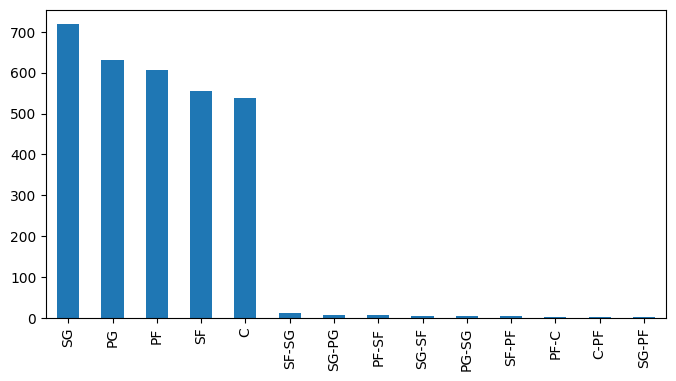

In [542]:
# look at all the different positions listed in the dataset
df['pos'].value_counts().plot.bar(figsize=(8, 4)) 

# Data Learning

## Kmeans

In [609]:
def kmeans(X, n_clusters):
    """
        Use KMeans to group the data into a specified number of clusters
        
        :param DataFrame X: scaled data to be clustered
        :param int n_clusters: number of clusters required
    """
    
    # Instantiate the model with a particular number of clusters and other parameters
    model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200,
                   n_init=10, random_state=0)

    # fit the model ... i.e. find the n clusters
    model.fit(X)

    # predict the closest cluster for each sample of X
    predicted=model.predict(X)
    
    # Return key cluster information: score, centres and labels
    
    return (model.inertia_, model.cluster_centers_, model.labels_, predicted)

## Selecting number of clusters

In [544]:
kbest_scores = []
for i in range(1, 11):
    score, centres, labels = kmeans(X, i)
    sizes = pd.Series(labels).value_counts().to_dict()
    print('KMeans has {} clusters with sizes {} with score {:.2f}'
          .format(i, sizes, score))
    kbest_scores.append(score)

silhouette_scores = []
for j in range(2,11):
    score, centres, labels = kmeans(X, j)
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters = {}, silhouette score is {})".format(j, silhouette_avg))
    silhouette_scores.append(silhouette_avg)


KMeans has 1 clusters with sizes {0: 3090} with score 1780.10
KMeans has 2 clusters with sizes {0: 2289, 1: 801} with score 1295.18
KMeans has 3 clusters with sizes {1: 1523, 0: 855, 2: 712} with score 1051.52
KMeans has 4 clusters with sizes {2: 936, 0: 792, 3: 691, 1: 671} with score 972.08
KMeans has 5 clusters with sizes {0: 921, 2: 756, 4: 657, 3: 390, 1: 366} with score 904.71
KMeans has 6 clusters with sizes {5: 769, 3: 631, 1: 572, 2: 395, 4: 371, 0: 352} with score 848.25
KMeans has 7 clusters with sizes {2: 645, 4: 567, 1: 464, 0: 440, 5: 368, 6: 356, 3: 250} with score 804.02
KMeans has 8 clusters with sizes {2: 603, 4: 544, 1: 440, 0: 407, 7: 379, 3: 331, 6: 255, 5: 131} with score 775.82
KMeans has 9 clusters with sizes {8: 505, 4: 442, 6: 390, 1: 378, 0: 337, 7: 327, 3: 317, 2: 249, 5: 145} with score 752.95
KMeans has 10 clusters with sizes {8: 478, 7: 424, 2: 344, 6: 338, 1: 318, 5: 295, 3: 253, 0: 251, 9: 250, 4: 139} with score 730.67
For n_clusters = 2, silhouette sc

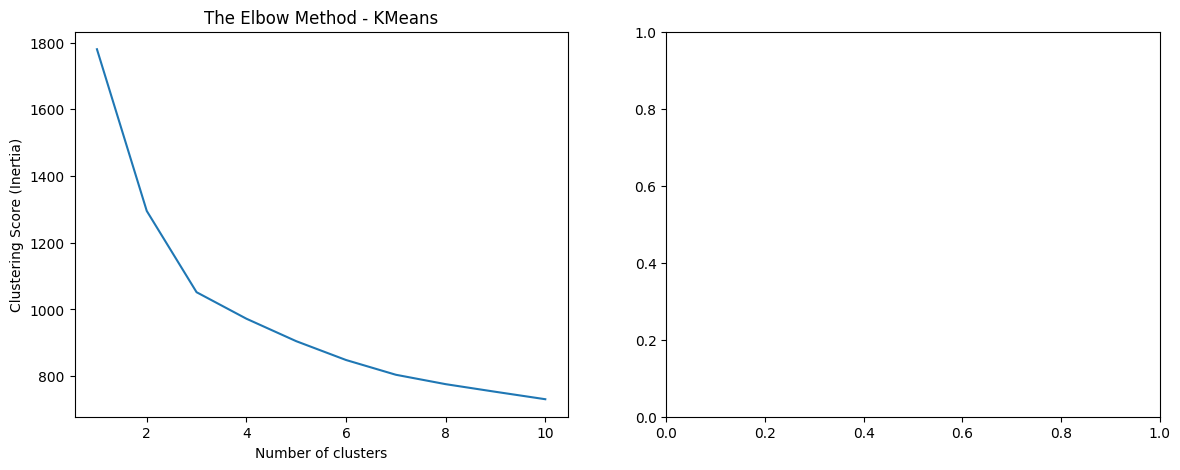

In [545]:
figure, axis = plt.subplots(1, 2, figsize=(14, 5))
axis[0].plot(range(1, 11), kbest_scores)
axis[0].set_title('The Elbow Method - KMeans')
axis[0].set_xlabel('Number of clusters')
axis[0].set_ylabel('Clustering Score (Inertia)')

plt.show() 

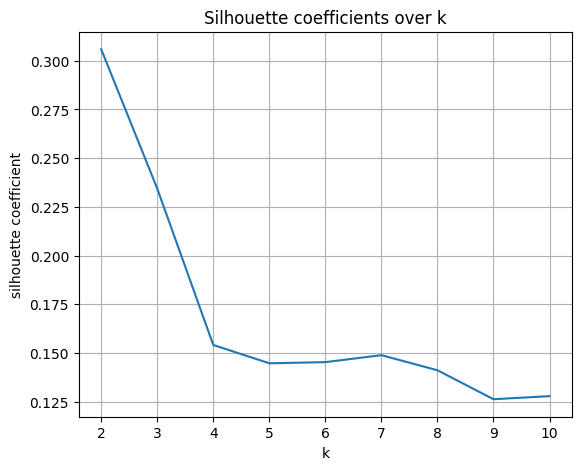

In [546]:
# Plot Silhouette coefficient
plt.figure(figsize=(14,5))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 11), silhouette_scores)
plt.grid(True)


In [581]:
positions = list(df['pos'])
def list_clusters(method, X, n_clusters, scaler, positions):
    
    score, centres, labels = method(X, n_clusters)
    
    sizes = pd.Series(labels).value_counts().to_dict()

    position_split = {}
    for i, label in enumerate(labels):
        position = positions[i]
        if label not in position_split:
            position_split[label] = {}
        if position not in position_split[label]:
            position_split[label][position] = 0
        position_split[label][position] += 1

    print('\nThere are {} clusters with a total score of {:.1f}\n'
          .format(len(sizes), score))

    # Re-scale the centres so that they have their original range and
    # put them in a dictionary to identify which variable they relate to
    # so that centres are meaningful

    for label, centre in enumerate(centres):
        centre = {X.columns[i]: 
                  round(centre[i] * scaler.data_range_[i] 
                        + scaler.data_min_[i], 2) for i in range(len(centre))}
        print('Cluster {} has {} players with positions {} and centre:\n{}\n'
              .format(label, sizes[label], position_split[label], centre))

    return

In [582]:
list_clusters(kmeans, X, 7, scaler, positions)


There are 7 clusters with a total score of 804.0

Cluster 0 has 440 players with positions {'PF': 219, 'C': 73, 'SG': 38, 'SF': 102, 'PG': 3, 'SG-SF': 1, 'C-PF': 1, 'SF-PF': 2, 'PF-SF': 1} and centre:
{'fg_per_100_poss': 8.46, 'fga_per_100_poss': 18.13, 'fg_percent': 0.47, 'x3p_per_100_poss': 1.88, 'x3pa_per_100_poss': 5.4, 'x3p_percent': 0.34, 'x2p_per_100_poss': 6.58, 'x2pa_per_100_poss': 12.74, 'x2p_percent': 0.52, 'ft_per_100_poss': 3.43, 'fta_per_100_poss': 4.54, 'ft_percent': 0.75, 'orb_per_100_poss': 2.52, 'drb_per_100_poss': 8.07, 'trb_per_100_poss': 10.59, 'ast_per_100_poss': 3.36, 'stl_per_100_poss': 1.48, 'blk_per_100_poss': 1.22, 'tov_per_100_poss': 2.54, 'pf_per_100_poss': 4.27, 'pts_per_100_poss': 22.22, 'o_rtg': 109.02, 'd_rtg': 108.38}

Cluster 1 has 464 players with positions {'SG': 100, 'PG': 325, 'SF': 20, 'SG-PG': 6, 'PF': 8, 'SF-SG': 1, 'SG-SF': 1, 'PG-SG': 2, 'PF-SF': 1} and centre:
{'fg_per_100_poss': 7.74, 'fga_per_100_poss': 17.99, 'fg_percent': 0.43, 'x3p_per

Text(0.5, 1.0, '3 KMeans clusters\nplotted in 2 component space')

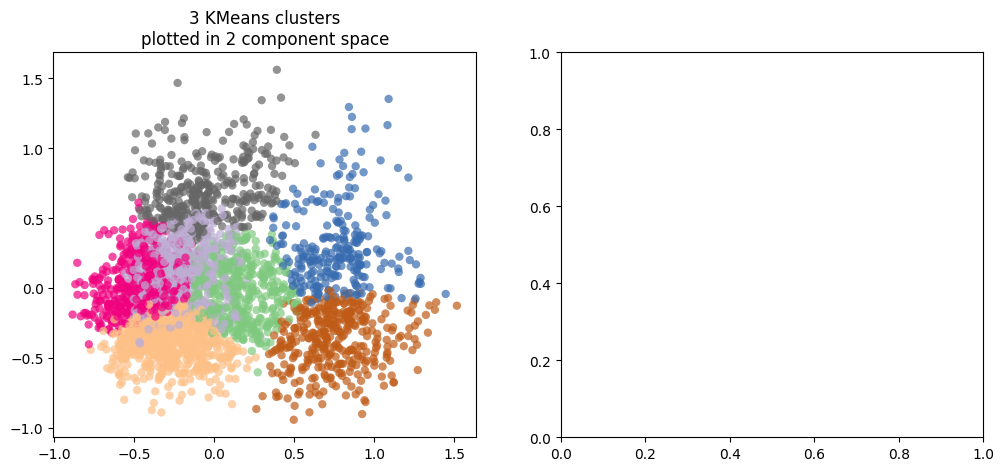

In [578]:
_, _, kmeans_labels = kmeans(X, 7)

# reduce to 2 dimensions to make more visible
X_PCA = PCA(2).fit_transform(X)

kwargs = dict(cmap = plt.colormaps.get_cmap('Accent'),
              edgecolor='none', alpha=0.7)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_PCA[:, 0], X_PCA[:, 1], c=kmeans_labels, **kwargs)
ax[0].set_title('3 KMeans clusters\nplotted in 2 component space')


# Merging kmeans cluster prediction into original dataset

In [619]:
score, centres, labels, predicted = kmeans(X, 7)

df['cluster'] = pd.Series(predicted, index=df.index)

df.sample(10)

,season,player_id,player,pos,age,experience,tm,g,gs,mp,...,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,cluster
6291,2014,3765,Josh McRoberts,PF,26,7,CHA,78,78.0,2360,...,8.2,7.3,1.3,1.0,1.8,4.2,14.5,115.0,105.0,2
272,2023,5061,Jeremy Sochan,PF,19,1,SAS,48,45.0,1242,...,9.0,4.6,1.4,0.8,3.2,4.7,18.3,102.0,121.0,0
4411,2017,3327,Joe Johnson,SF,35,16,UTA,78,14.0,1843,...,6.9,4.1,1.0,0.5,2.0,2.6,20.3,109.0,108.0,4
2130,2020,4465,Alex Caruso,PG,25,3,LAL,64,2.0,1175,...,5.0,5.0,2.8,0.7,2.1,4.0,14.1,107.0,106.0,2
389,2023,4426,Malik Beasley,SG,26,7,TOT,58,14.0,1533,...,6.4,3.0,1.5,0.3,2.0,2.5,24.1,107.0,118.0,4
6650,2013,3584,Charlie Villanueva,PF,28,8,DET,69,0.0,1092,...,11.7,2.6,1.5,1.9,1.9,4.6,22.6,101.0,106.0,4
3195,2019,4345,Larry Nance Jr.,C,26,4,CLE,67,30.0,1795,...,15.3,5.9,2.8,1.1,2.7,5.3,17.3,120.0,112.0,5
5097,2016,4039,Lavoy Allen,PF,26,5,IND,79,28.0,1599,...,13.2,2.4,0.8,1.3,2.1,4.6,13.3,110.0,104.0,5
4562,2017,3410,Nenê,C,34,15,HOU,67,8.0,1198,...,11.3,2.6,2.2,1.6,2.9,6.5,24.4,118.0,106.0,5
2286,2020,4400,Domantas Sabonis,PF,23,4,IND,62,62.0,2159,...,17.3,7.0,1.1,0.7,3.8,4.4,25.8,115.0,106.0,3
